In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

The training set consists of 28,709 examples. The public test set used for the leaderboard consists of 3,589 examples. The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

In [2]:
from keras.models import load_model
model = load_model('./emotion_recognition_new11.h5')

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
person = ['Anger: ', 'Disgust: ','Fear: ','Happy: ', 'Sad: ', 'Suprise: ','Neutral: ']
font = cv2.FONT_HERSHEY_DUPLEX
faces_cas = cv2.CascadeClassifier('haar_cascade.xml')

In [ ]:
cap = cv2.VideoCapture(0)
i = 0
ret= True
while ret == True:
    ret, img = cap.read()
    if ret == False:
        cap.release()
        cv2.destroyAllWindows()
        break
        
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faces_cas.detectMultiScale(gray,1.3,8)
    
    for x, y , w , h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+w),(0,255,0),2)
        roi = gray[y:y+h, x:x+w]
        i += 1  
        #if roi.shape[0] >= 64:
        roi = cv2.resize(roi,(48,48))
        #else:
          #  roi= cv2.resize(roi,(64,64), cv2.INTER_LINEAR)
            
        
        #cv2.imwrite('../home_database/img'+str(i)+'.png',roi)
        roi = roi.astype('float32')
        test = roi.reshape((1,1,48,48)) / 255
        out = model.predict(test)
        percent = str(int(out[0][out.argmax()] * 100))
        cv2.rectangle(img,(x,y), (x+w,y+20),(0,255,0), -1)
        cv2.putText(img, person[int(out.argmax())]+percent+'%',(x, y+20), font, 0.6, (255, 255, 255), 1)
        
         
    cv2.imshow('windows', img)
    cv2.imshow('gray',gray)

    if cv2.waitKey(41) ==27:
        break
        

cap.release()
cv2.destroyAllWindows()

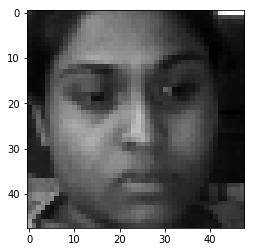

In [21]:
plt.imshow(roi, cmap ='gray')

In [22]:
roi = roi.astype('float32')
test = roi.reshape((1,1,48,48)) / 255
out = model.predict(test)
percent = str(int(out[0][out.argmax()] * 100))
cv2.rectangle(img,(x,y), (x+w,y+20),(0,255,0), -1)
cv2.putText(img, person[int(out.argmax())]+percent+'%',(x, y+20), font, 0.6, (255, 255, 255), 1)
        



array([[[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [118, 117, 121],
        [115, 114, 118],
        [104, 103, 107]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [194, 193, 197],
        [192, 191, 195],
        [192, 191, 195]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [230, 229, 233],
        [230, 229, 233],
        [228, 227, 231]],

       ...,

       [[ 18,  16,  15],
        [ 13,  11,  10],
        [ 13,  11,  10],
        ...,
        [ 24,  19,  18],
        [ 24,  19,  18],
        [ 22,  17,  16]],

       [[ 18,  16,  15],
        [ 13,  11,  10],
        [ 13,  11,  10],
        ...,
        [ 24,  19,  18],
        [ 24,  19,  18],
        [ 22,  17,  16]],

       [[ 18,  16,  15],
        [ 13,  11,  10],
        [ 13,  11,  10],
        ...,
        [ 24,  19,  18],
        [ 24,  19,  18],
        [ 22,  17,  16]]

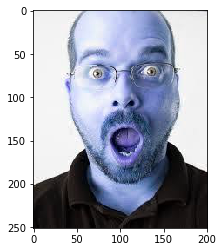

In [23]:
plt.imshow(img)

In [24]:
out

array([[0.01775449, 0.00109186, 0.02681641, 0.00711015, 0.20433693,
        0.00230571, 0.7405845 ]], dtype=float32)